In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/movie-review/joker_reviews-recent.csv
/kaggle/input/movie-review/The Dark Knight 2008.csv
/kaggle/input/movie-review/Star Wars Episode VIII - The Last Jedi 2017.csv
/kaggle/input/movie-review/Man of Steel 2013.csv
/kaggle/input/movie-review/Interstellar 2014.csv
/kaggle/input/movie-review/Joker 2019.csv
/kaggle/input/movie-review/data.csv
/kaggle/input/movie-review/Star Wars Episode VII - The Force Awakens 2015.csv
/kaggle/input/movie-review/Prometheus 2012.csv


In [2]:
  # Import all the tools we need


# Regular EDA(exploratory data analysis) and plotting libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
%matplotlib inline

def setup_data(df):
    '''
    Preprocess some basic works
    '''
    # Drop every column except the specified column
    df = df[['rating', 'review']]
    # Drop Null rows
    df = df[~(df == 'Null').any(axis=1)]
    return df

def remove_big_review(rev):
    '''
    Removes big review greter than length
    '''
    if len(rev)>3000:
        rev = 'Null'
    return rev

def clean_text(test):
    '''
    Clean's up the unnecessary thiings of a text by replacing them with proper symbols.
    '''
    test = test.replace('<br/>', '')
    test = test.replace('--', ' ')
    test = test.replace("'", '')
    test = test.replace('"','')
#     test = test.replace('.', '')
    test = test.replace(',', '')
#     test = test.replace('?', '')
#     test = test.replace('!', '')
    test = test.replace('\n', '')
    test = test.replace('(', '')
    test = test.replace(')', '')
    test = test.lower()
    test = test.replace('</li></ul><ul><li>', ' ')
    test = test.replace('< ul><li >', ' ')
    test = test.replace('< /li></ul >', ' ')
    test = test.replace('</li><li >', ' ')
    test = test.replace('< /li><li >', ' ')
     
    return test


def level(x):
    '''
    Changes predicted levels to human brain level.
    '''
    if x in [10, 9, 8]:
        x = 0
    elif x in [7, 6]:
        x = 1
    elif x in [5, 4]:
        x = 2
    elif x in [1, 2, 3]:
        x = 3
    return x

def level2(x):
    '''
    Changes predicted levels to human brain level.
    '''
    if x > 5:
        x = 0
    else:
        x = 1
    return x

def plot_rate(df):
    df.label.value_counts().plot(kind='bar', cmap='summer', title='IMDb Rating');

In [3]:
data = pd.read_csv('/kaggle/input/movie-review/Star Wars Episode VIII - The Last Jedi 2017.csv')

In [4]:
data.head(2)

,username,rating,helpful,total,date,title,review
0,yupman,1,4721,5759,2 January 2018,The Last Jedi was just magical\n,SPOILER: This movie was just magical.<br/><br/...
1,shoresk-37122,3,2606,3228,14 February 2018,I made an account just to say how disappointe...,"This didn't feel like Star Wars. Now, I know p..."


In [5]:
data.shape

(6691, 7)

In [6]:
df = data
df.review = df.review.apply(remove_big_review)
df = setup_data(df)
# df.shape
# Clean the text removing unnecessary things
df['review'] = df['review'].apply(clean_text)
df.rating = df.rating.astype(int)
data = df

In [7]:
data.columns=['label','text']

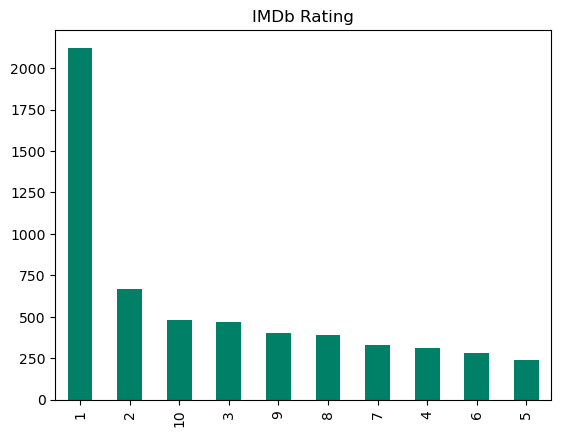

In [8]:
plot_rate(data)

In [9]:
data.shape

(5694, 2)

In [10]:
main_df = data.copy()

In [11]:
data.label = data.label.apply(level)

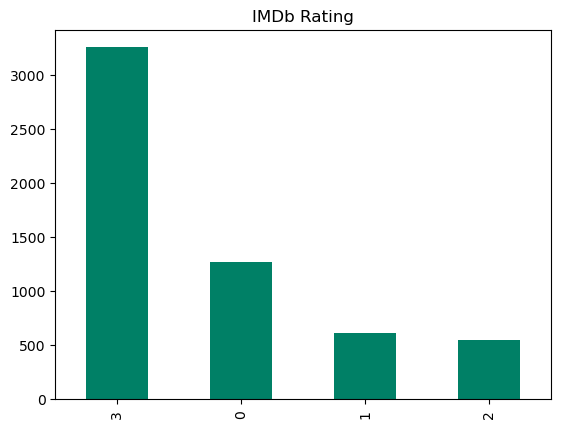

In [12]:
plot_rate(data)

In [13]:
level_df = pd.DataFrame({'level': [0, 1, 2, 3],
                         'range': [[10, 9], [8,7,6], [4,5], [1,2,3]],
                         'class':['SuperHit', 'Good', 'Below Average','Flop']})
level_df

,level,range,class
0,0,"[10, 9]",SuperHit
1,1,"[8, 7, 6]",Good
2,2,"[4, 5]",Below Average
3,3,"[1, 2, 3]",Flop


## Model S
This Model Analyses the sentiment of the review. Positive or negetive.

In [14]:
main_df.label.value_counts()

1     2124
2      664
10     481
3      470
9      401
8      388
7      332
4      311
6      283
5      240
Name: label, dtype: int64

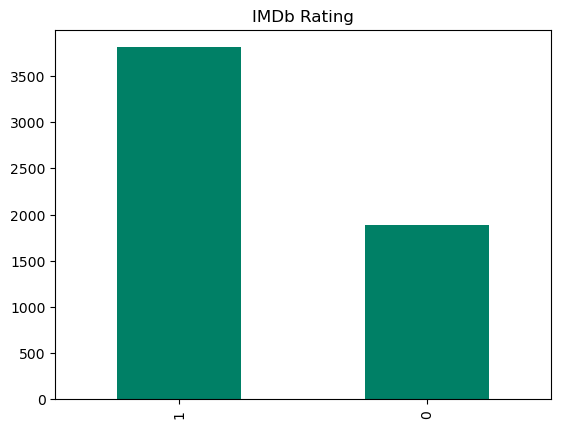

In [15]:
sdf = main_df.copy()
sdf.label = sdf.label.apply(level2)
plot_rate(sdf)

In [16]:
sdf.shape

(5694, 2)

> ## Word Clouding

In [17]:
# from wordcloud import WordCloud
# def display_wc(text, title):
#     wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)
#     plt.figure(figsize=(10, 6))
#     plt.imshow(wordcloud, interpolation='bilinear')
#     plt.axis('off')
#     plt.title(title)
#     plt.show()

In [18]:
# Initialize an empty string
text = ''

# Iterate through each row of the dataframe
for index, row in sdf.iterrows():
    review = row['text']  # Get the review from the current row
    text += review + ' '   # Append the review to the text string with a space


## For OverAll Data

In [19]:
# display_wc(text, 'Overall Reviews')

In [20]:
np.random.seed(42)
train, test = train_test_split(sdf, test_size=0.2)
len(train), len(test)

(4555, 1139)

In [21]:
train.to_csv('/kaggle/working/s_train.csv', index=False)
test.to_csv('/kaggle/working/s_test.csv', index=False)

In [22]:
test.head(2)

,label,text
1605,1,i wanted to like this movie. i saw the first s...
841,1,last jedi pulled off an impressive feat. it ma...


In [23]:
mp = 512

In [24]:
from datasets import load_dataset
from transformers import BertTokenizer, TFBertModel,AutoTokenizer
from transformers import DataCollatorWithPadding

dataset = load_dataset('csv', data_files={'train':'/kaggle/working/s_train.csv',
                                              'test':'/kaggle/working/s_test.csv'})

tokenizer = AutoTokenizer.from_pretrained('distilbert-base-uncased')

def preprocess_function(examples):
    return tokenizer(examples["text"], truncation=True,padding=True)

tokenized_data = dataset.map(preprocess_function, batched=True)

data_collator=DataCollatorWithPadding(tokenizer=tokenizer,return_tensors='tf')

id2label = {0:0,1:1}
label2id = {0:0,1:1}
from transformers import create_optimizer
import tensorflow as tf
batch_size=16
num_epochs=4
batch_per_epoch=len(tokenized_data["train"])
total_train_steps=int(batch_per_epoch*num_epochs)
optimizer,schedule=create_optimizer(init_lr=2e-5,num_warmup_steps=0,
                                    num_train_steps=total_train_steps)

/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/__init__.py:98: UserWarning: unable to load libtensorflow_io_plugins.so: unable to open file: libtensorflow_io_plugins.so, from paths: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io_plugins.so']
caused by: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io_plugins.so: undefined symbol: _ZN3tsl6StatusC1EN10tensorflow5error4CodeESt17basic_string_viewIcSt11char_traitsIcEENS_14SourceLocationE']
  warnings.warn(f"unable to load libtensorflow_io_plugins.so: {e}")
/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/__init__.py:104: UserWarning: file system plugins are not loaded: unable to open file: libtensorflow_io.so, from paths: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io.so']
caused by: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io.so: undefined symbol: _ZTVN10tenso

Extracting data files:   0%|          | 0/2 [00:00<?, ?it/s]

Dataset csv downloaded and prepared to /root/.cache/huggingface/datasets/csv/default-49e9a12b4894a47c/0.0.0/433e0ccc46f9880962cc2b12065189766fbb2bee57a221866138fb9203c83519. Subsequent calls will reuse this data.


/opt/conda/lib/python3.10/site-packages/datasets/packaged_modules/csv/csv.py:154: FutureWarning: the 'mangle_dupe_cols' keyword is deprecated and will be removed in a future version. Please take steps to stop the use of 'mangle_dupe_cols'
  csv_file_reader = pd.read_csv(file, iterator=True, dtype=dtype, **self.config.read_csv_kwargs)
/opt/conda/lib/python3.10/site-packages/datasets/packaged_modules/csv/csv.py:154: FutureWarning: the 'mangle_dupe_cols' keyword is deprecated and will be removed in a future version. Please take steps to stop the use of 'mangle_dupe_cols'
  csv_file_reader = pd.read_csv(file, iterator=True, dtype=dtype, **self.config.read_csv_kwargs)


  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?ba/s]

  0%|          | 0/2 [00:00<?, ?ba/s]

In [25]:
from transformers import TFAutoModelForSequenceClassification
modelS=TFAutoModelForSequenceClassification.from_pretrained(
    'distilbert-base-uncased',num_labels=2,id2label=id2label,label2id=label2id,
    ignore_mismatched_sizes=True, max_position_embeddings=mp
    
)
tf_train_set = modelS.prepare_tf_dataset(
    tokenized_data["train"],
    shuffle=True,
    batch_size=16,
    collate_fn=data_collator,
)
tf_validation_set = modelS.prepare_tf_dataset(
    tokenized_data["test"],
    shuffle=False,
    batch_size=16,
    collate_fn=data_collator,
)

Some weights of the PyTorch model were not used when initializing the TF 2.0 model TFDistilBertForSequenceClassification: ['vocab_transform.bias', 'vocab_layer_norm.bias', 'vocab_transform.weight', 'vocab_layer_norm.weight', 'vocab_projector.bias']
- This IS expected if you are initializing TFDistilBertForSequenceClassification from a PyTorch model trained on another task or with another architecture (e.g. initializing a TFBertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFDistilBertForSequenceClassification from a PyTorch model that you expect to be exactly identical (e.g. initializing a TFBertForSequenceClassification model from a BertForSequenceClassification model).
Some weights or buffers of the TF 2.0 model TFDistilBertForSequenceClassification were not initialized from the PyTorch model and are newly initialized: ['pre_classifier.weight', 'pre_classifier.bias', 'classifier.weight', 'classifier.bias']
You should 

In [26]:
modelS.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=3e-5, epsilon=1e-08, clipnorm=1.0), 
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), 
              metrics=[tf.keras.metrics.SparseCategoricalAccuracy('accuracy')])

In [27]:
# Slice the dataset from length 100 to 10
n = 400
sliced_dataset_train = tf_train_set.take(n)
sliced_dataset_test = tf_validation_set.take(n)

In [28]:
sliced_dataset_test

<_TakeDataset element_spec=({'input_ids': TensorSpec(shape=(None, None), dtype=tf.int64, name=None), 'attention_mask': TensorSpec(shape=(None, None), dtype=tf.int64, name=None)}, TensorSpec(shape=(None,), dtype=tf.int64, name=None))>

In [29]:
print(modelS.config)

DistilBertConfig {
  "_name_or_path": "distilbert-base-uncased",
  "activation": "gelu",
  "architectures": [
    "DistilBertForMaskedLM"
  ],
  "attention_dropout": 0.1,
  "dim": 768,
  "dropout": 0.1,
  "hidden_dim": 3072,
  "id2label": {
    "0": 0,
    "1": 1
  },
  "initializer_range": 0.02,
  "label2id": {
    "0": 0,
    "1": 1
  },
  "max_position_embeddings": 512,
  "model_type": "distilbert",
  "n_heads": 12,
  "n_layers": 6,
  "pad_token_id": 0,
  "qa_dropout": 0.1,
  "seq_classif_dropout": 0.2,
  "sinusoidal_pos_embds": false,
  "tie_weights_": true,
  "transformers_version": "4.29.2",
  "vocab_size": 30522
}



In [30]:
# modelS.fit(x=tf_train_set,validation_data=tf_validation_set, epochs=4)
history = modelS.fit(x=tf_train_set,validation_data=tf_validation_set, epochs=num_epochs)

Epoch 1/4
284/284 [==============================] - 207s 611ms/step - loss: 0.3954 - accuracy: 0.8290 - val_loss: 0.3160 - val_accuracy: 0.8753
Epoch 2/4
284/284 [==============================] - 176s 620ms/step - loss: 0.2237 - accuracy: 0.9236 - val_loss: 0.3730 - val_accuracy: 0.8472
Epoch 3/4
284/284 [==============================] - 175s 615ms/step - loss: 0.1214 - accuracy: 0.9613 - val_loss: 0.3663 - val_accuracy: 0.8665
Epoch 4/4
284/284 [==============================] - 174s 613ms/step - loss: 0.0601 - accuracy: 0.9828 - val_loss: 0.4338 - val_accuracy: 0.8569


In [31]:
# Get the training and validation accuracy from the history
train_acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
train_acc = [round(acc, 4) for acc in train_acc]
print(f'train = {train_acc}\n')
val_acc = [round(acc, 4) for acc in val_acc]
print(f'validation = {val_acc}')

train = [0.829, 0.9236, 0.9613, 0.9828]

validation = [0.8753, 0.8472, 0.8665, 0.8569]


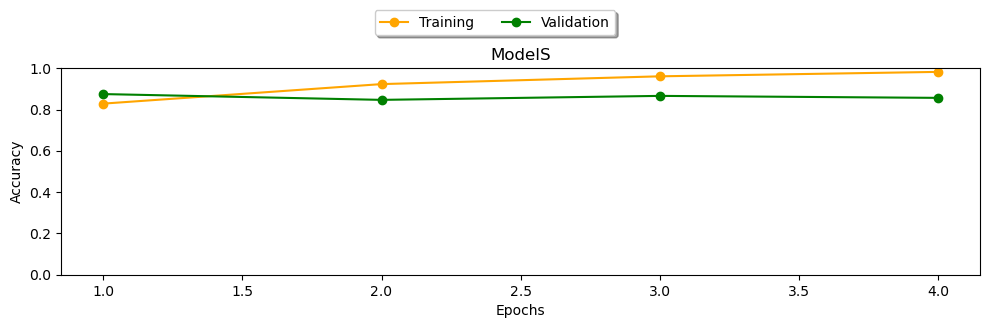

In [32]:
import matplotlib.pyplot as plt

# # Example data
epochs = [i for i in range(1, num_epochs+1)]
#jk
train_loss_1 = train_acc
val_loss_1 = val_acc

# Create three subplots
fig, axes = plt.subplots(1, 1, figsize=(10, 3))

# Plot for Model 1
axes.plot(epochs, train_loss_1, label='Training Loss',color='orange', linestyle='-', 
             marker='o')
axes.plot(epochs, val_loss_1, label='Validation Loss', color='green', linestyle='-', 
             marker='o')
axes.set_xlabel('Epochs')
axes.set_ylabel('Accuracy')
axes.set_title('ModelS')
axes.set_ylim([0, 1])

# Add legend at the top
legend_labels = ['Training', 'Validation']
fig.legend(legend_labels, loc='upper center', 
           bbox_to_anchor=(0.5, 1.10), ncol=2, fancybox=True, shadow=True)



# Adjust spacing between subplots
plt.tight_layout()

# Display the plot
plt.show()

In [33]:
# # Evaluate the model on the training and validation datasets
# train_acc = modelS.evaluate(tf_train_set)[1]
# val_acc = modelS.evaluate(tf_validation_set)[1]

In [34]:
def custom_test(text, model):
    inputs=tokenizer(text,return_tensors="tf")
    tf_outputs = model(inputs)                                  
    tf_predictions = tf.nn.softmax(tf_outputs[0], axis=-1) 
    # print(tf_predictions)
    logits=modelS(**inputs).logits
    # print("Logits :",logits)
    predicted_class_id = int(tf.math.argmax(logits, axis=-1)[0])
    return predicted_class_id

In [35]:
text = 'This is a very bad movie. I hatedit. Very bad screenplay. Very bad direction and hope not to see it again.'
custom_test(text, modelS)

1

In [36]:
text = 'Very good movie. I loved every part of it. Highly recommended for everyone'
custom_test(text, modelS)

0

In [37]:
true = list(test[:50].label)
test_text = list(test[:50].text)

In [38]:
true[:15]

[1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1]

Token indices sequence length is longer than the specified maximum sequence length for this model (600 > 512). Running this sequence through the model will result in indexing errors


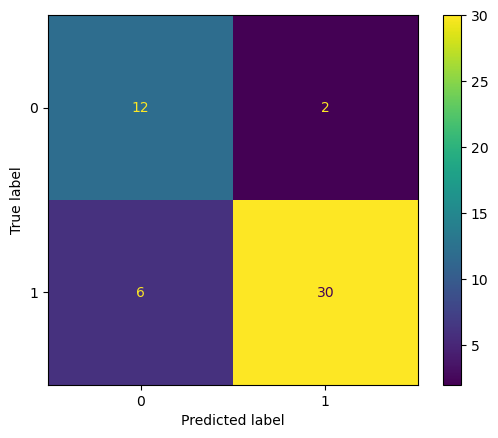

In [39]:
preds = []
for text in test_text:
    preds.append(custom_test(text, modelS))
    
    
from sklearn.metrics import confusion_matrix
from sklearn import metrics

# Make our confusion matrixx more visual with Seaborn's heatmap()
import seaborn as sb

con_mat = confusion_matrix(true, preds)

con_mat_plot = metrics.ConfusionMatrixDisplay(confusion_matrix=con_mat, display_labels=[0,1])
con_mat_plot.plot()
plt.show()

## ModelUP

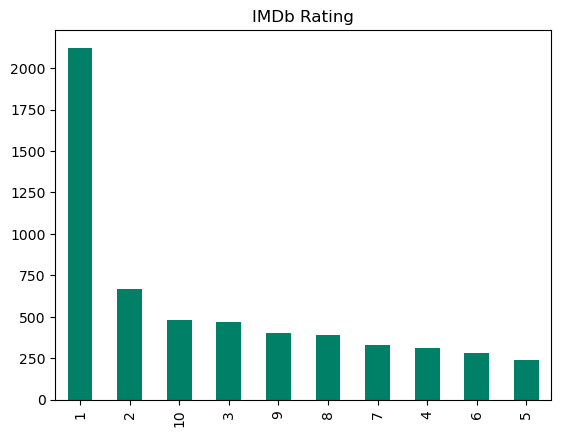

In [40]:
plot_rate(main_df)

In [41]:
updf = main_df[main_df['label'] > 5].copy()

In [42]:
updf.label.value_counts()

10    481
9     401
8     388
7     332
6     283
Name: label, dtype: int64

In [43]:
def level_up(x):
    '''
    Changes predicted levels to human brain level.
    '''
    if x in [10, 9]:
        x = 0
    elif x in [8, 7, 6]:
        x = 1
    return x

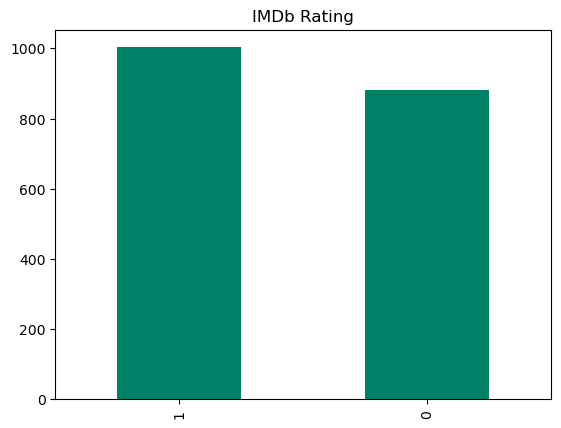

In [44]:
updf['label'] = updf['label'].apply(level_up)
plot_rate(updf)

In [45]:
def drop_ten(n, df):
    
    for i in range(n):
        ind_to_drop = np.random.randint(1,10000)
        try:
            if df.label[ind_to_drop] == 0:
                df = df.drop(ind_to_drop)
        except:
            continue
    return df

In [46]:
# updf = drop_ten(2000, updf)
# plot_rate(updf)

## Word Clouding

In [47]:
# Initialize an empty string
text = ''

# Iterate through each row of the dataframe
for index, row in updf.iterrows():
    review = row['text']  # Get the review from the current row
    text += review + ' '   # Append the review to the text string with a space


In [48]:
# display_wc(text, 'Positive Reviews')

In [49]:
updf.to_csv('/kaggle/working/up_data.csv', index=False)

In [50]:
np.random.seed(42)
train, test = train_test_split(updf, test_size=0.2)
len(train), len(test)

(1508, 377)

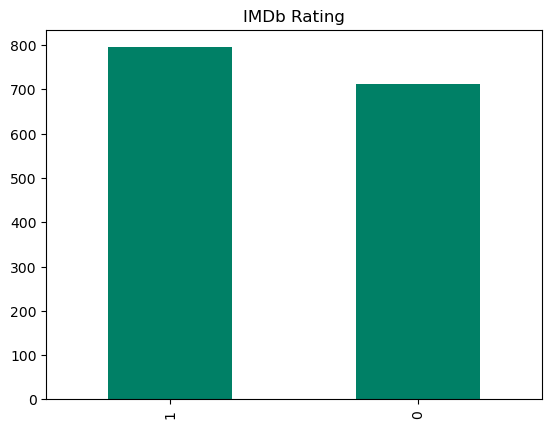

In [51]:
plot_rate(train)

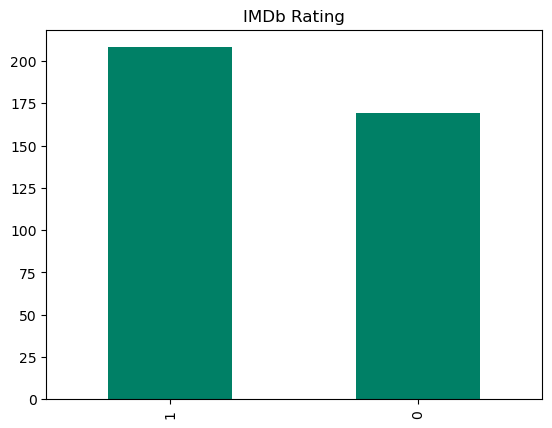

In [52]:
plot_rate(test)

In [53]:
train.to_csv('/kaggle/working/u_train.csv', index=False)
test.to_csv('/kaggle/working/u_test.csv', index=False)

In [54]:
dataset = load_dataset('csv', data_files={'train':'/kaggle/working/u_train.csv',
                                              'test':'/kaggle/working/u_test.csv'})

tokenizer = AutoTokenizer.from_pretrained('distilbert-base-uncased')

tokenized_data = dataset.map(preprocess_function, batched=True)

data_collator=DataCollatorWithPadding(tokenizer=tokenizer,return_tensors='tf')

id2label = {0:0,1:1}
label2id = {0:0,1:1}
from transformers import create_optimizer
import tensorflow as tf
batch_size=16
num_epochs=4
batch_per_epoch=len(tokenized_data["train"])
total_train_steps=int(batch_per_epoch*num_epochs)
optimizer,schedule=create_optimizer(init_lr=2e-5,num_warmup_steps=0,num_train_steps=total_train_steps)

Extracting data files:   0%|          | 0/2 [00:00<?, ?it/s]

Dataset csv downloaded and prepared to /root/.cache/huggingface/datasets/csv/default-b75bc56bc6d379b0/0.0.0/433e0ccc46f9880962cc2b12065189766fbb2bee57a221866138fb9203c83519. Subsequent calls will reuse this data.


/opt/conda/lib/python3.10/site-packages/datasets/packaged_modules/csv/csv.py:154: FutureWarning: the 'mangle_dupe_cols' keyword is deprecated and will be removed in a future version. Please take steps to stop the use of 'mangle_dupe_cols'
  csv_file_reader = pd.read_csv(file, iterator=True, dtype=dtype, **self.config.read_csv_kwargs)
/opt/conda/lib/python3.10/site-packages/datasets/packaged_modules/csv/csv.py:154: FutureWarning: the 'mangle_dupe_cols' keyword is deprecated and will be removed in a future version. Please take steps to stop the use of 'mangle_dupe_cols'
  csv_file_reader = pd.read_csv(file, iterator=True, dtype=dtype, **self.config.read_csv_kwargs)


  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?ba/s]

  0%|          | 0/1 [00:00<?, ?ba/s]

In [55]:
modelUP=TFAutoModelForSequenceClassification.from_pretrained(
    'distilbert-base-uncased',num_labels=2,id2label=id2label,label2id=label2id,
    ignore_mismatched_sizes=True, max_position_embeddings=512
    
)
tf_train_set = modelUP.prepare_tf_dataset(
    tokenized_data["train"],
    shuffle=True,
    batch_size=16,
    collate_fn=data_collator,
)
tf_validation_set = modelUP.prepare_tf_dataset(
    tokenized_data["test"],
    shuffle=False,
    batch_size=16,
    collate_fn=data_collator,
)

Some weights of the PyTorch model were not used when initializing the TF 2.0 model TFDistilBertForSequenceClassification: ['vocab_transform.bias', 'vocab_layer_norm.bias', 'vocab_transform.weight', 'vocab_layer_norm.weight', 'vocab_projector.bias']
- This IS expected if you are initializing TFDistilBertForSequenceClassification from a PyTorch model trained on another task or with another architecture (e.g. initializing a TFBertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFDistilBertForSequenceClassification from a PyTorch model that you expect to be exactly identical (e.g. initializing a TFBertForSequenceClassification model from a BertForSequenceClassification model).
Some weights or buffers of the TF 2.0 model TFDistilBertForSequenceClassification were not initialized from the PyTorch model and are newly initialized: ['pre_classifier.weight', 'pre_classifier.bias', 'classifier.weight', 'classifier.bias']
You should 

In [56]:
modelUP.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=3e-5, epsilon=1e-08, clipnorm=1.0), 
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), 
              metrics=[tf.keras.metrics.SparseCategoricalAccuracy('accuracy')])

In [57]:
modelUP.config

DistilBertConfig {
  "_name_or_path": "distilbert-base-uncased",
  "activation": "gelu",
  "architectures": [
    "DistilBertForMaskedLM"
  ],
  "attention_dropout": 0.1,
  "dim": 768,
  "dropout": 0.1,
  "hidden_dim": 3072,
  "id2label": {
    "0": 0,
    "1": 1
  },
  "initializer_range": 0.02,
  "label2id": {
    "0": 0,
    "1": 1
  },
  "max_position_embeddings": 512,
  "model_type": "distilbert",
  "n_heads": 12,
  "n_layers": 6,
  "pad_token_id": 0,
  "qa_dropout": 0.1,
  "seq_classif_dropout": 0.2,
  "sinusoidal_pos_embds": false,
  "tie_weights_": true,
  "transformers_version": "4.29.2",
  "vocab_size": 30522
}

In [58]:
# Slice the dataset from length 100 to 10
n = 300
sliced_dataset_train = tf_train_set.take(n)
sliced_dataset_test = tf_validation_set.take(n)

history = modelUP.fit(x=tf_train_set,validation_data=tf_validation_set, epochs=num_epochs)



Epoch 1/4
94/94 [==============================] - 84s 607ms/step - loss: 0.6746 - accuracy: 0.5838 - val_loss: 0.5931 - val_accuracy: 0.7003
Epoch 2/4
94/94 [==============================] - 55s 586ms/step - loss: 0.5363 - accuracy: 0.7334 - val_loss: 0.5989 - val_accuracy: 0.7082
Epoch 3/4
94/94 [==============================] - 56s 595ms/step - loss: 0.3149 - accuracy: 0.8803 - val_loss: 0.6407 - val_accuracy: 0.7215
Epoch 4/4
94/94 [==============================] - 56s 592ms/step - loss: 0.1708 - accuracy: 0.9435 - val_loss: 0.8101 - val_accuracy: 0.7268


In [59]:
# Get the training and validation accuracy from the history
train_acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
train_acc = [round(acc, 4) for acc in train_acc]
print(f'train = {train_acc}\n')
val_acc = [round(acc, 4) for acc in val_acc]
print(f'validation = {val_acc}')

train = [0.5838, 0.7334, 0.8803, 0.9435]

validation = [0.7003, 0.7082, 0.7215, 0.7268]


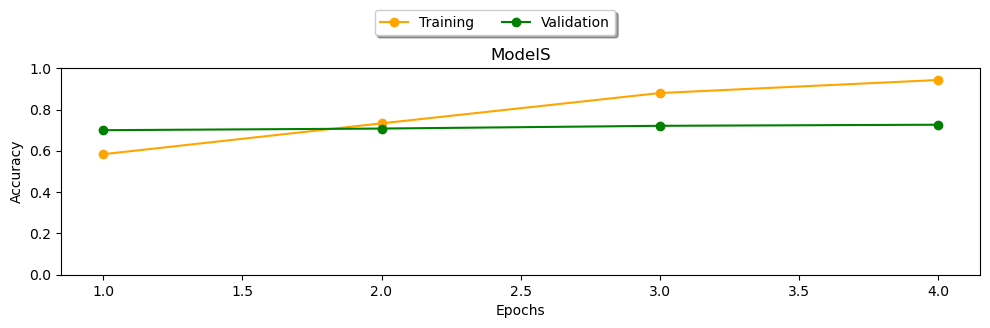

In [60]:
import matplotlib.pyplot as plt

# # Example data
epochs = [i for i in range(1, num_epochs+1)]
#jk
train_loss_1 = train_acc
val_loss_1 = val_acc

# Create three subplots
fig, axes = plt.subplots(1, 1, figsize=(10, 3))

# Plot for Model 1
axes.plot(epochs, train_loss_1, label='Training Loss',color='orange', linestyle='-', 
             marker='o')
axes.plot(epochs, val_loss_1, label='Validation Loss', color='green', linestyle='-', 
             marker='o')
axes.set_xlabel('Epochs')
axes.set_ylabel('Accuracy')
axes.set_title('ModelS')
axes.set_ylim([0, 1])

# Add legend at the top
legend_labels = ['Training', 'Validation']
fig.legend(legend_labels, loc='upper center', 
           bbox_to_anchor=(0.5, 1.10), ncol=2, fancybox=True, shadow=True)



# Adjust spacing between subplots
plt.tight_layout()

# Display the plot
plt.show()

Token indices sequence length is longer than the specified maximum sequence length for this model (527 > 512). Running this sequence through the model will result in indexing errors


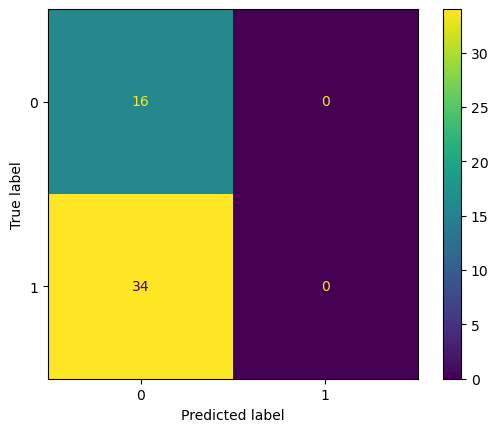

In [61]:
from tqdm import tqdm
true = list(test[:50].label)
test_text = list(test[:50].text)

predup = []
for text in test_text:
    predup.append(custom_test(text, modelUP))
    
con_mat = confusion_matrix(true, predup)

con_mat_plot = metrics.ConfusionMatrixDisplay(confusion_matrix=con_mat, display_labels=[0,1])
con_mat_plot.plot()
plt.show()

## ModelDoWN

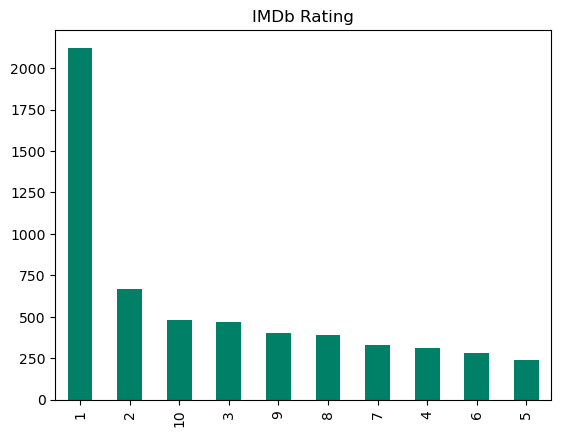

In [62]:
plot_rate(main_df)

In [63]:
ddf = main_df[main_df['label'] <= 5].copy()
ddf.label.value_counts()

1    2124
2     664
3     470
4     311
5     240
Name: label, dtype: int64

In [64]:
# Initialize an empty string
text = ''

# Iterate through each row of the dataframe
for index, row in ddf.iterrows():
    review = row['text']  # Get the review from the current row
    text += review + ' '   # Append the review to the text string with a space


In [65]:
# display_wc(text, 'Negative Reviews')

In [66]:
def level_down(x):
    '''
    Changes predicted levels to human brain level.
    '''
    if x in [4, 5]:
        x = 0
    elif x in [1, 2, 3]:
        x = 1
    return x

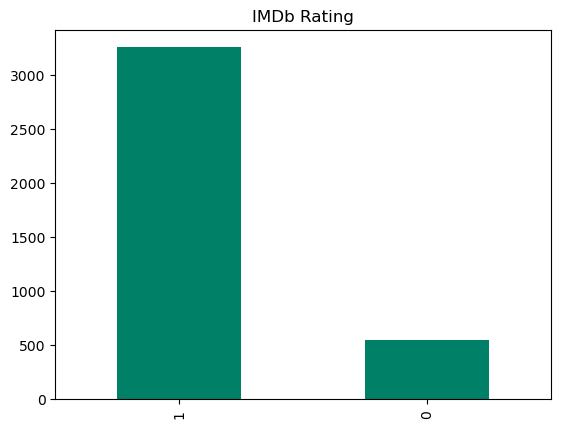

In [67]:
ddf['label'] = ddf['label'].apply(level_down)
plot_rate(ddf)

In [68]:
ddf.shape

(3809, 2)

In [69]:
def drop_one(n, df):
    
    for i in range(n):
        ind_to_drop = np.random.randint(1,4900)
        try:
            if df.label[ind_to_drop] == 1:
                df = df.drop(ind_to_drop)
        except:
            continue
    return df

(1871, 2)


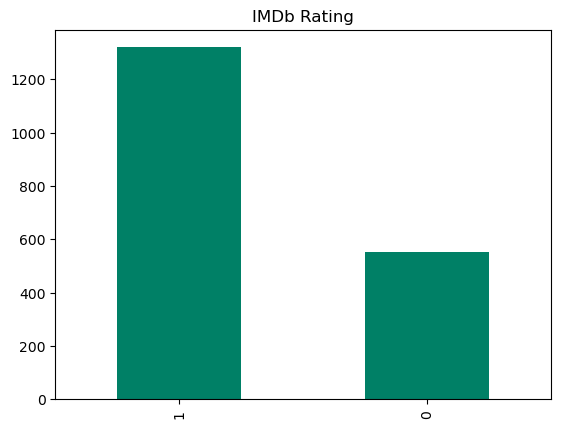

In [70]:
ddf = drop_one(5000, ddf)
print(ddf.shape)
plot_rate(ddf)

In [71]:
ddf.to_csv('/kaggle/working/dwn_data.csv', index=False)
ddf.tail()

,label,text
6608,1,i have never been so disappointed in a movie. ...
6645,1,i never thought ill have so mixed feelings abo...
6670,1,the last jedi had so much potential. brilliant...
6671,0,walking into the crowded theater with others w...
6677,1,i will not drag about the movie itself plenty ...


In [72]:
np.random.seed(42)
train, test = train_test_split(ddf, test_size=0.2)
len(train), len(test)

(1496, 375)

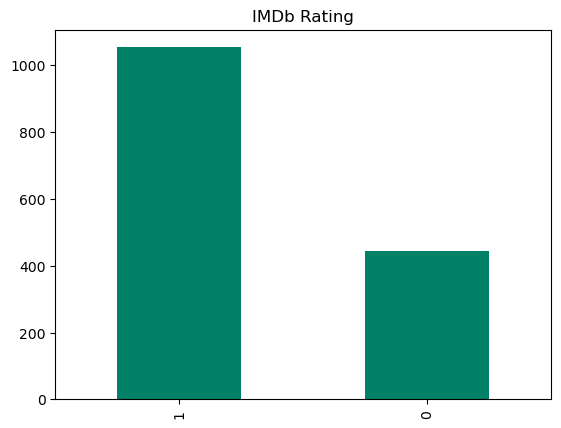

In [73]:
plot_rate(train)

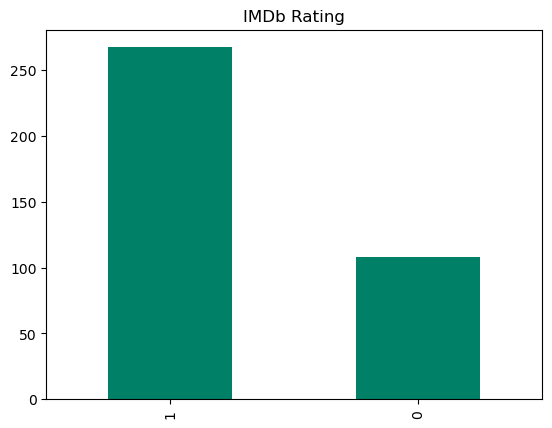

In [74]:
plot_rate(test)

In [75]:
train.to_csv('/kaggle/working/d_train.csv', index=False)
test.to_csv('/kaggle/working/d_test.csv', index=False)

In [76]:
dataset = load_dataset('csv', data_files={'train':'/kaggle/working/d_train.csv',
                                              'test':'/kaggle/working/d_test.csv'})

tokenizer = AutoTokenizer.from_pretrained('distilbert-base-uncased')

tokenized_data = dataset.map(preprocess_function, batched=True)

data_collator=DataCollatorWithPadding(tokenizer=tokenizer,return_tensors='tf')

id2label = {0:0,1:1}
label2id = {0:0,1:1}
from transformers import create_optimizer
import tensorflow as tf
batch_size=16
num_epochs=4
batch_per_epoch=len(tokenized_data["train"])
total_train_steps=int(batch_per_epoch*num_epochs)
optimizer,schedule=create_optimizer(init_lr=2e-5,num_warmup_steps=0,
                                    num_train_steps=total_train_steps)

Extracting data files:   0%|          | 0/2 [00:00<?, ?it/s]

Dataset csv downloaded and prepared to /root/.cache/huggingface/datasets/csv/default-adb50535f59c5965/0.0.0/433e0ccc46f9880962cc2b12065189766fbb2bee57a221866138fb9203c83519. Subsequent calls will reuse this data.


/opt/conda/lib/python3.10/site-packages/datasets/packaged_modules/csv/csv.py:154: FutureWarning: the 'mangle_dupe_cols' keyword is deprecated and will be removed in a future version. Please take steps to stop the use of 'mangle_dupe_cols'
  csv_file_reader = pd.read_csv(file, iterator=True, dtype=dtype, **self.config.read_csv_kwargs)
/opt/conda/lib/python3.10/site-packages/datasets/packaged_modules/csv/csv.py:154: FutureWarning: the 'mangle_dupe_cols' keyword is deprecated and will be removed in a future version. Please take steps to stop the use of 'mangle_dupe_cols'
  csv_file_reader = pd.read_csv(file, iterator=True, dtype=dtype, **self.config.read_csv_kwargs)


  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?ba/s]

  0%|          | 0/1 [00:00<?, ?ba/s]

In [77]:
modelDN=TFAutoModelForSequenceClassification.from_pretrained(
    'distilbert-base-uncased',num_labels=2,id2label=id2label,label2id=label2id,
    ignore_mismatched_sizes=True, max_position_embeddings=512
    
)
tf_train_set = modelDN.prepare_tf_dataset(
    tokenized_data["train"],
    shuffle=True,
    batch_size=16,
    collate_fn=data_collator,
)
tf_validation_set = modelDN.prepare_tf_dataset(
    tokenized_data["test"],
    shuffle=False,
    batch_size=16,
    collate_fn=data_collator,
)

Some weights of the PyTorch model were not used when initializing the TF 2.0 model TFDistilBertForSequenceClassification: ['vocab_transform.bias', 'vocab_layer_norm.bias', 'vocab_transform.weight', 'vocab_layer_norm.weight', 'vocab_projector.bias']
- This IS expected if you are initializing TFDistilBertForSequenceClassification from a PyTorch model trained on another task or with another architecture (e.g. initializing a TFBertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFDistilBertForSequenceClassification from a PyTorch model that you expect to be exactly identical (e.g. initializing a TFBertForSequenceClassification model from a BertForSequenceClassification model).
Some weights or buffers of the TF 2.0 model TFDistilBertForSequenceClassification were not initialized from the PyTorch model and are newly initialized: ['pre_classifier.weight', 'pre_classifier.bias', 'classifier.weight', 'classifier.bias']
You should 

In [78]:
modelDN.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=3e-5, epsilon=1e-08, clipnorm=1.0), 
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), 
              metrics=[tf.keras.metrics.SparseCategoricalAccuracy('accuracy')])


In [82]:
# Slice the dataset from length 100 to 10
n = 50
sliced_dataset_train = tf_train_set.take(n)
sliced_dataset_test = tf_validation_set.take(n)

history = modelDN.fit(x=tf_train_set,validation_data=tf_validation_set, epochs=num_epochs)

Epoch 1/4
93/93 [==============================] - 54s 585ms/step - loss: 0.5800 - accuracy: 0.7023 - val_loss: 0.5586 - val_accuracy: 0.7120
Epoch 2/4
93/93 [==============================] - 56s 598ms/step - loss: 0.4947 - accuracy: 0.7440 - val_loss: 0.5689 - val_accuracy: 0.7467
Epoch 3/4
93/93 [==============================] - 55s 593ms/step - loss: 0.3384 - accuracy: 0.8555 - val_loss: 0.7013 - val_accuracy: 0.7173
Epoch 4/4
93/93 [==============================] - 55s 595ms/step - loss: 0.1486 - accuracy: 0.9469 - val_loss: 0.8605 - val_accuracy: 0.7307


In [83]:
# Get the training and validation accuracy from the history
train_acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
train_acc = [round(acc, 4) for acc in train_acc]
print(f'train = {train_acc}\n')
val_acc = [round(acc, 4) for acc in val_acc]
print(f'validation = {val_acc}')

train = [0.7023, 0.744, 0.8555, 0.9469]

validation = [0.712, 0.7467, 0.7173, 0.7307]


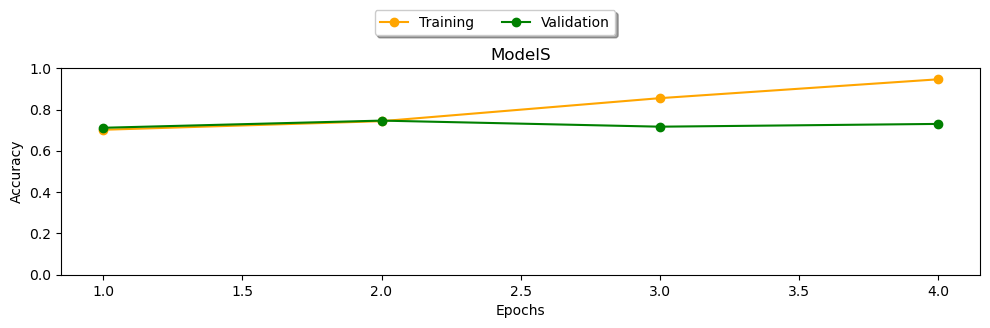

In [84]:
import matplotlib.pyplot as plt

# # Example data
epochs = [i for i in range(1, num_epochs+1)]
#jk
train_loss_1 = train_acc
val_loss_1 = val_acc

# Create three subplots
fig, axes = plt.subplots(1, 1, figsize=(10, 3))

# Plot for Model 1
axes.plot(epochs, train_loss_1, label='Training Loss',color='orange', linestyle='-', 
             marker='o')
axes.plot(epochs, val_loss_1, label='Validation Loss', color='green', linestyle='-', 
             marker='o')
axes.set_xlabel('Epochs')
axes.set_ylabel('Accuracy')
axes.set_title('ModelS')
axes.set_ylim([0, 1])

# Add legend at the top
legend_labels = ['Training', 'Validation']
fig.legend(legend_labels, loc='upper center', 
           bbox_to_anchor=(0.5, 1.10), ncol=2, fancybox=True, shadow=True)



# Adjust spacing between subplots
plt.tight_layout()

# Display the plot
plt.show()

Token indices sequence length is longer than the specified maximum sequence length for this model (536 > 512). Running this sequence through the model will result in indexing errors


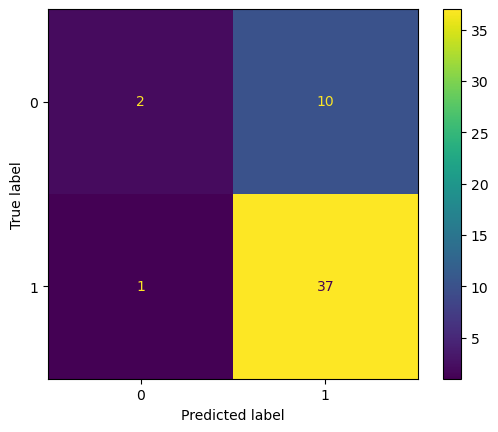

In [85]:
true = list(test[:50].label)
test_text = list(test[:50].text)

preddn = []
for text in test_text:
    preddn.append(custom_test(text, modelDN))
    
con_mat = confusion_matrix(true, preddn)

con_mat_plot = metrics.ConfusionMatrixDisplay(confusion_matrix=con_mat, display_labels=[0,1])
con_mat_plot.plot()
plt.show()

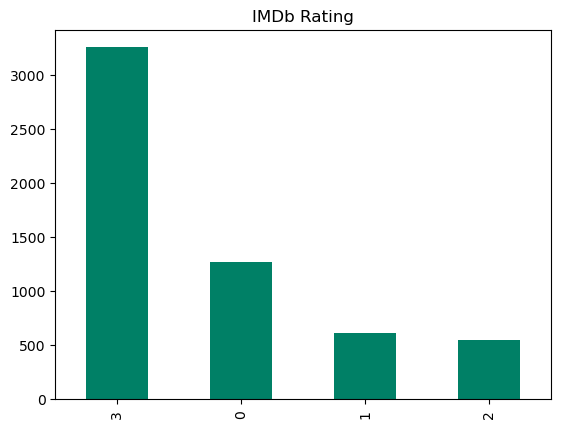

In [86]:
plot_rate(data)

## FInal section


In [87]:
ft =data.copy()

In [88]:
np.random.seed(42)
train, test = train_test_split(ft, test_size=0.2)
len(train), len(test)

(4555, 1139)

In [89]:
n = 3271
true = list(test.label)
test_text = list(test.text)

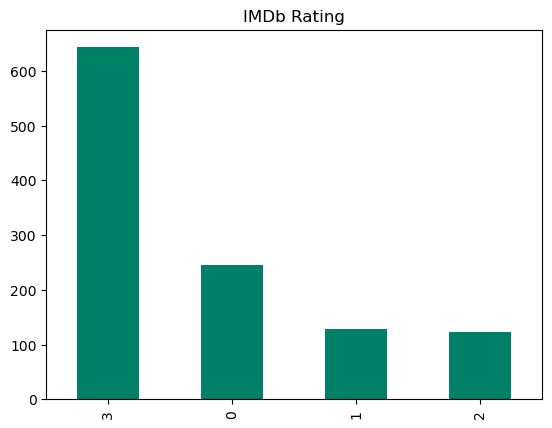

In [90]:
plot_rate(test)

In [91]:
def custom_test_model(text, model):
    inputs=tokenizer(text,return_tensors="tf")
    tf_outputs = model(inputs)                                  
    tf_predictions = tf.nn.softmax(tf_outputs[0], axis=-1) 
    # print(tf_predictions)
    logits=modelS(**inputs).logits
    # print("Logits :",logits)
    predicted_class_id = int(tf.math.argmax(logits, axis=-1)[0])
    return predicted_class_id

In [92]:
def final_prediction(test_text):
    '''
    Makes the final prediction ^_^
    '''
#     preds = []
#     predup = []
#     preddown = []
    fpred = []
    for text in test_text:
        s = custom_test_model(text, modelS)
#         preds.append(custom_test(text, modelS))
        if s == 0:
            # Sentiment Positive So check text with modelUP
            up = custom_test_model(text, modelUP)
            # Up will return 0(9,10)-->{0} or 1 (6,7, 8)-->{1}
            fpred.append(up)
        elif s == 1:
            # Sentiment negetive So check text with modelDN
            dn = custom_test_model(text, modelDN)
            # dn will return 0(4, 5, 3)-->{2} or 1 (1,2)-->{3}
            dn += 2
            fpred.append(dn)
    return fpred

In [93]:
level_df

,level,range,class
0,0,"[10, 9]",SuperHit
1,1,"[8, 7, 6]",Good
2,2,"[4, 5]",Below Average
3,3,"[1, 2, 3]",Flop


In [ ]:
# prediction = final_prediction(test_text)

In [94]:
true[:15]

[3, 3, 3, 3, 0, 3, 3, 2, 3, 0, 3, 0, 3, 0, 2]

In [96]:
def custom_test_up(text):
    inputs=tokenizer(text,return_tensors="tf")
    tf_outputs = modelS(inputs)                                  
    tf_predictions =np.argmax( tf.nn.softmax(tf_outputs[0], axis=-1) )
   
    if tf_predictions==0:
        tf_outputs = modelUP(inputs)                                  
        tf_predictions_final =np.argmax( tf.nn.softmax(tf_outputs[0], axis=-1) ) 
        
    else:
        tf_outputs = modelDN(inputs)                                  
        tf_predictions_final =np.argmax( tf.nn.softmax(tf_outputs[0], axis=-1) )+2
         
    return tf_predictions_final

In [97]:
text = 'This is a very bad movie. I hatedit. Very bad screenplay. Very bad direction and hope not to see it again.'
custom_test_up(text)

3

In [98]:
text = 'Very good movie. I loved every part of it. Highly recommended for everyone'
custom_test_up(text)

0

In [99]:
text = 'this is an average movie. Not that good not that bad. It was pretty decent and enjoyable but not that great.'
custom_test_up(text)

1

In [100]:
text = 'this is bellow average movie. Not that bad not good. It was not enjoyable. I would not recommend it but it was not worst.'
custom_test_up(text)

1

In [101]:
from tqdm import tqdm
prediction = []
for text in tqdm(test_text):
    prediction.append(custom_test_up(text))

100%|██████████| 1139/1139 [04:04<00:00,  4.66it/s]


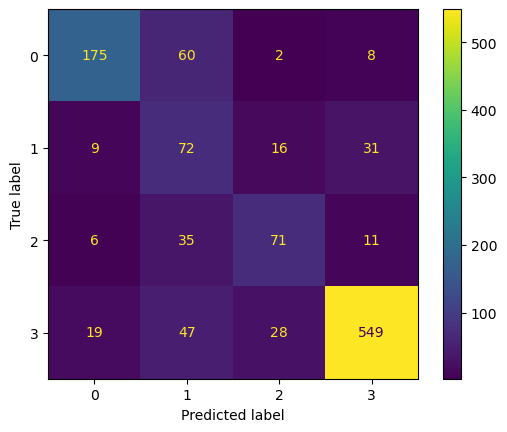

In [102]:
con_mat = confusion_matrix(true, prediction)

con_mat_plot = metrics.ConfusionMatrixDisplay(confusion_matrix=con_mat, display_labels=[0,1, 2, 3])
con_mat_plot.plot()
plt.show()

In [103]:
from sklearn.metrics import accuracy_score

# Calculate accuracy score
accuracy = accuracy_score(true, prediction)

print(f"Accuracy: {accuracy*100:.2f}%", )

Accuracy: 76.12%


In [ ]:
level_df

In [ ]:
# Create the data for the DataFrame
cdata = {
    'rating': [0, 0, 0, 1, 0, 0, 2, 3, 3, 2],
    'review': ["Absolutely loved it!",
               "Great movie, highly recommended.", 
               "A compelling and intense film.", 
               "Good, but could have been better.", 
               "A masterpiece of storytelling.",
              '''Joker is a truly remarkable film that takes us 
              on a journey into the origins of a legendary villain.
              With Joaquin Phoenix's captivating performance and 
              a thought-provoking storyline, Joker is a dark and intense
              exploration of the human mind. It breaks free from traditional
              superhero movies, leaving a lasting impression that will keep you
              thinking long after the movie ends.
              Don't miss this extraordinary cinematic experience.''',
              '''Joker falls short of its high expectations,
              leaving much to be desired. While Joaquin Phoenix delivers a committed
              performance, the film's storyline feels convoluted and lacking in depth.
              The dark and gritty atmosphere often overshadows any meaningful narrative,
              resulting in a confusing and disjointed viewing experience. Despite moments of 
              intensity, Joker fails to deliver a cohesive story or compelling character
              development. It's a missed opportunity to truly explore the depths of 
              this iconic character.''',
               '''
               Joker is an absolute disappointment, 
               failing on almost every level. Despite the hype surrounding 
               Joaquin Phoenix's performance, it cannot salvage this mess of a film. 
               The storyline is a convoluted mess, lacking coherence and purpose. 
               The attempt to delve into the character's psyche falls flat, 
               resulting in a shallow portrayal that leaves the audience perplexed and
               disengaged. The excessive darkness and violence serve no purpose other than
               shock value, adding to the overall unpleasant viewing experience. Joker is a 
               perfect example of style over substance, ultimately failing to deliver any 
               meaningful or thought-provoking content. 
               Save yourself the agony and skip this trainwreck of a film.
               ''',
               '''
               Joker is an absolute trainwreck that fails to live up to its potential. 
               Joaquin Phoenix's performance, while committed, cannot salvage this mess of a film.
               The storyline is a convoluted mess, lacking any coherence or substance. Instead of 
               exploring the complexities of the character, the film relies on shock value and 
               gratuitous violence, leaving the audience feeling repulsed rather than engaged. 
               The attempts at social commentary fall flat, coming across as pretentious and forced. 
               Joker is a prime example of style over substance, sacrificing narrative cohesion for
               a misguided attempt at artistic expression. 
               Save yourself the agony and avoid this cringe-worthy disaster of a film.
               ''',
               
               '''
               Joker is a movie that didn't quite live up to its hype. 
               Despite Joaquin Phoenix's efforts, the story didn't hold my attention 
               or make much sense.It was good but not that good. The social messages it tried 
               to convey felt forced and heavy-handed, lacking subtlety. 
               Overall, Joker was a letdown that didn't deliver a satisfying or coherent experience.
               '''
              ]
}
cdata =  pd.DataFrame(cdata)
cdata.review = cdata.review.apply(clean_text)
cdata

In [ ]:
true = list(cdata.rating)
test_text = list(cdata.review)

In [ ]:
pred = []
for text in (test_text):
    pred.append(custom_test_up(text))

In [ ]:
print(pred)
print(true)

In [ ]:
con_mat = confusion_matrix(true, pred)

con_mat_plot = metrics.ConfusionMatrixDisplay(confusion_matrix=con_mat, display_labels=[0,1, 2, 3])
con_mat_plot.plot()
plt.show()


## For 3000 test data

In [ ]:
# con_mat = confusion_matrix(true, prediction)

# con_mat_plot = metrics.ConfusionMatrixDisplay(confusion_matrix=con_mat, display_labels=[0,1, 2, 3])
# con_mat_plot.plot()
# plt.show()

In [ ]:
# # Calculate accuracy score
# accuracy = accuracy_score(true, prediction)

# print(f"Accuracy: {accuracy*100:.2f}%", )

### author: `Minhazul Islam Nannu`, `Tanbeer Jubaer`